In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/train.csv',
                 
                 names=[
                        'sentences',
                        'label' 
                         ])
df.head()

,sentences,label
0,tweet,class
1,' #علمتني_الحياه أن الذين يعيشون على الأرض ليس...,pos
2,' #ميري_كرسمس كل سنة وانتم طيبين http://t.co/n...,pos
3,' و انتهى مشوار الخواجة ',neg
4,' مش عارف ابتدى مذاكره منين :/ ',neg


In [4]:
!pip install arabic-reshaper
!pip install python-bidi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


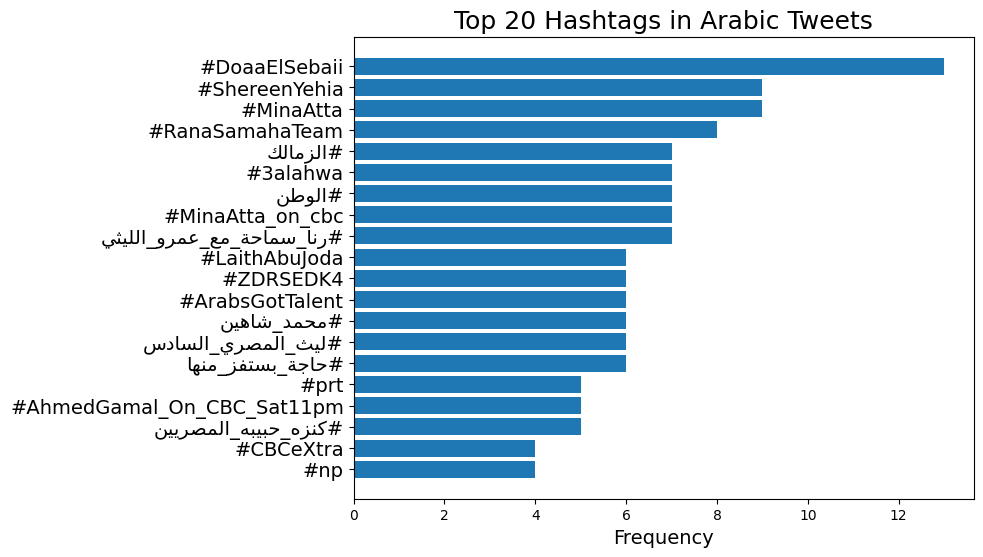

In [5]:
import re
from collections import Counter
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

# Extract all hashtags from the 'sentences' column
all_hashtags = []
for sentence in df['sentences']:
    words = sentence.split()
    hashtags = [word for word in words if word.startswith('#')]
    all_hashtags.extend(hashtags)

hashtag_freq = Counter(all_hashtags)


top_hashtags = hashtag_freq.most_common(20)


reshaped_hashtags = [get_display(arabic_reshaper.reshape(hashtag)) for hashtag, freq in top_hashtags]

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(range(len(top_hashtags)), [freq for hashtag, freq in top_hashtags], align='center')
ax.set_yticks(range(len(top_hashtags)))
ax.set_yticklabels(reshaped_hashtags, fontsize=14)
ax.invert_yaxis()  
ax.set_xlabel('Frequency', fontsize=14)
ax.set_title('Top 20 Hashtags in Arabic Tweets', fontsize=18)
plt.show()

In [6]:
# combine all the preprocessed tweets into a single string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
all_text = " ".join(df["sentences"])

words = word_tokenize(all_text)

num_words = len(words)

print("Number of words in the dataset:", num_words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Number of words in the dataset: 32597


In [7]:
# define a regular expression pattern to match English words

import re
import string

english_pattern = re.compile(r'\b\w*[a-zA-Z]+\w*\b')

df['sentences'] = df['sentences'].apply(lambda x: re.sub(english_pattern, '', str(x)))





In [8]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('arabic')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading arabic: Package 'arabic' not found in index


False

In [9]:
df['sentences'] = df['sentences'].str.replace('http\S+|www.\S+|@\S+|@', '', case=False)


<ipython-input-9-e3446fb76bba>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentences'] = df['sentences'].str.replace('http\S+|www.\S+|@\S+|@', '', case=False)


In [10]:

import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\u2665" # heart symbol
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emojis(df.iloc[1]['sentences'])


"' #علمتني_الحياه أن الذين يعيشون على الأرض ليسوا ملائكة بل بشر قد يصيبوا وقد يخطئوا فلا يجوز أن أحكم على شخص من موقف واحد تعاملت معه فيه '"

In [11]:
import re

# Assuming 'data' is your dataset and 'sentences' is the column containing the sentences

# Remove hashtags using regex
df['sentences'] = df['sentences'].apply(lambda x: re.sub(r'#\w+', '', x))

df['sentences'] = df['sentences'].apply(lambda x: re.sub(r'\b\w*\d\w*\b', '', x))

# 'data['sentences']' will contain the column with hashtags removed

In [12]:

def remove_special_symbols(text):
    # Remove non-alphanumeric characters, but keep Arabic characters
    text = re.sub(r'[^\w\s\u0600-\u06FF]', '', text, flags=re.UNICODE)
    return text

df['sentences'] = df['sentences'].apply(remove_special_symbols)



In [13]:
# combine all the sentences into a single string
from nltk import FreqDist
all_sentences = " ".join(df["sentences"].astype(str))

# tokenize the text into individual words
words = word_tokenize(all_sentences)

# create a frequency distribution of the words
fdist = FreqDist(words)

# print the most common words
print(fdist.most_common(10))

[('من', 360), ('و', 298), ('في', 253), ('يا', 183), ('الله', 173), ('كل', 157), ('على', 152), ('مش', 152), ('انا', 146), ('ما', 132)]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


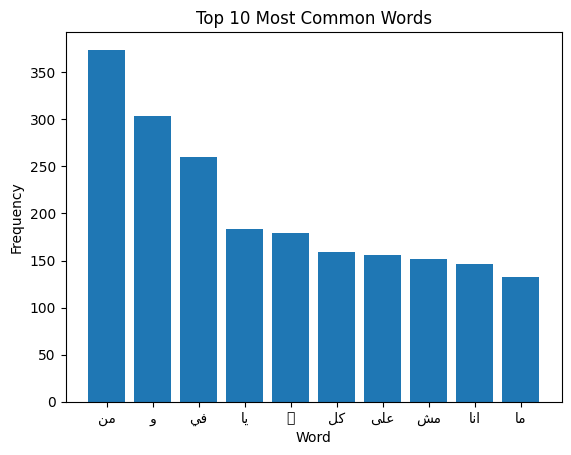

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
from arabic_reshaper import reshape
from bidi.algorithm import get_display
from matplotlib.font_manager import FontProperties

all_words = []
for sentence in df['sentences']:
   
    sentence = reshape(sentence)
    sentence = get_display(sentence)
  
    words = sentence.split()
    all_words.extend(words)

word_freq = Counter(all_words)

top_words = word_freq.most_common(10)


plt.rcParams["font.family"] = "DejaVu Sans"
plt.bar(range(len(top_words)), [freq for word, freq in top_words], align='center')
plt.xticks(range(len(top_words)), [word for word, freq in top_words])
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words')
plt.show()

In [15]:
# import re
# def remove_elongated_letters(text):
#     pattern = r'(\p{Arabic})(\1{2,})'  # Matches three or more consecutive occurrences of an Arabic letter
#     return re.sub(pattern, r'\1\1', text)
# df['sentences'] = df['sentences'].apply(remove_elongated_letters)

# df.head(60)

In [16]:
!pip install arabic_reshaper
!pip install buckwalter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement buckwalter (from versions: none)
ERROR: No matching distribution found for buckwalter


In [17]:
def clean_arabic_text(text):
    pattern = r'(.)\1{2,}'
    result = re.sub(pattern, r'\1\1', text)
    return result
df['sentences'] = df['sentences'].apply(clean_arabic_text)

In [18]:
import nltk
from nltk.tokenize import TweetTokenizer


nltk.download('punkt')

tokenized_tweets = []

for tweet in df['sentences']:
    tokens = word_tokenize(tweet)
    tokenized_tweets.append(tokens)

df['tokenized_tweets'] = tokenized_tweets
    






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
df.head(120)

,sentences,label,tokenized_tweets
0,,class,[]
1,أن الذين يعيشون على الأرض ليسوا ملائكة بل بش...,pos,"[أن, الذين, يعيشون, على, الأرض, ليسوا, ملائكة,..."
2,كل سنة وانتم طيبين,pos,"[كل, سنة, وانتم, طيبين]"
3,و انتهى مشوار الخواجة,neg,"[و, انتهى, مشوار, الخواجة]"
4,مش عارف ابتدى مذاكره منين,neg,"[مش, عارف, ابتدى, مذاكره, منين]"
...,...,...,...
115,تمام انا محتاجة النسخة الكاملة من اكتاب ضروري,neu,"[تمام, انا, محتاجة, النسخة, الكاملة, من, اكتاب..."
116,فندق اتلانتس,neu,"[فندق, اتلانتس]"
117,سألوا العرص هل تعلم نسبة البطالة في مصر ؟؟ ق...,neg,"[سألوا, العرص, هل, تعلم, نسبة, البطالة, في, مص..."
118,شاي و بسكويت للمره الرابعه علي التوازي _,neu,"[شاي, و, بسكويت, للمره, الرابعه, علي, التوازي, _]"


In [20]:

from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('arabic')

custom_stop_words = [ "؟", "،",  "انا",  "اللي", 'و', 'فى', 'على', 'ان' ]
stop_words.extend(custom_stop_words)

no_stopwords_tweets = []
for tweet in tokenized_tweets:
    no_stopwords_tokens = [token for token in tweet if token not in stop_words]
    no_stopwords_tweets.append(no_stopwords_tokens)

df['no_stopwords_tweets'] = no_stopwords_tweets


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
import string
import re

def remove_numbers_punctuation(text):
   
    text = re.sub(r'\d+', '', text)
   
    text = text.translate(str.maketrans('', '', string.punctuation.replace('_', '')))
    
    return text

df['no_stopwords_tweets'] = df['no_stopwords_tweets'].apply(lambda x: [remove_numbers_punctuation(token) for token in x])






In [22]:
# convert each list of preprocessed tweets to a string
df["no_stopwords_tweets"] = df["no_stopwords_tweets"].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


all_text = " ".join(df["no_stopwords_tweets"])


words = word_tokenize(all_text)

num_words = len(words)

print("Number of words in the dataset:", num_words)









Number of words in the dataset: 16531


In [23]:
df["no_stopwords_tweets"] = df["no_stopwords_tweets"].apply(lambda x: x.split() if isinstance(x, str) else x)


cleaned_tweets_list = df["no_stopwords_tweets"].tolist()

print("Number of tweets in the dataset:", len(cleaned_tweets_list))

Number of tweets in the dataset: 2060


In [24]:
import matplotlib.font_manager as fm

font_path = "/content/drive/MyDrive/Amiri/Amiri-Regular.ttf"  
fm.fontManager.addfont(font_path)

In [25]:
from gensim.models.fasttext import FastText
from gensim.utils import simple_preprocess

In [26]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
df.head()

,sentences,label,tokenized_tweets,no_stopwords_tweets
0,,class,[],[]
1,أن الذين يعيشون على الأرض ليسوا ملائكة بل بش...,pos,"[أن, الذين, يعيشون, على, الأرض, ليسوا, ملائكة,...","[يعيشون, الأرض, ملائكة, بشر, يصيبوا, وقد, يخطئ..."
2,كل سنة وانتم طيبين,pos,"[كل, سنة, وانتم, طيبين]","[سنة, وانتم, طيبين]"
3,و انتهى مشوار الخواجة,neg,"[و, انتهى, مشوار, الخواجة]","[انتهى, مشوار, الخواجة]"
4,مش عارف ابتدى مذاكره منين,neg,"[مش, عارف, ابتدى, مذاكره, منين]","[مش, عارف, ابتدى, مذاكره, منين]"


In [28]:
model = FastText(sentences=df['no_stopwords_tweets'], vector_size=100, window=5, min_count=1, sg=1)  # Adjust the parameters as needed
# Get the embedding vectors for all words in a sentence
def get_sentence_embeddings(sentence):
    embeddings = []
    for word in sentence:
        if word in model.wv:
            embeddings.append(model.wv[word])
    return embeddings


In [29]:
# Apply the get_sentence_embeddings function to create embeddings for each sentence
df['embeddings'] = df['no_stopwords_tweets'].apply(get_sentence_embeddings)

In [30]:
df.head(20)

,sentences,label,tokenized_tweets,no_stopwords_tweets,embeddings
0,,class,[],[],[]
1,أن الذين يعيشون على الأرض ليسوا ملائكة بل بش...,pos,"[أن, الذين, يعيشون, على, الأرض, ليسوا, ملائكة,...","[يعيشون, الأرض, ملائكة, بشر, يصيبوا, وقد, يخطئ...","[[-0.0063550323, 0.02652535, 0.011070348, 0.01..."
2,كل سنة وانتم طيبين,pos,"[كل, سنة, وانتم, طيبين]","[سنة, وانتم, طيبين]","[[-0.019922404, 0.061349187, 0.03383577, 0.039..."
3,و انتهى مشوار الخواجة,neg,"[و, انتهى, مشوار, الخواجة]","[انتهى, مشوار, الخواجة]","[[-0.014469544, 0.055876672, 0.030969013, 0.03..."
4,مش عارف ابتدى مذاكره منين,neg,"[مش, عارف, ابتدى, مذاكره, منين]","[مش, عارف, ابتدى, مذاكره, منين]","[[-0.016681526, 0.10053368, 0.06615284, 0.0616..."
5,إختصروا الطريق بدلا من إختيار المنصف ثم الان...,neg,"[إختصروا, الطريق, بدلا, من, إختيار, المنصف, ثم...","[إختصروا, الطريق, بدلا, إختيار, المنصف, الانقل...","[[-0.004231216, 0.018122157, 0.008707481, 0.01..."
6,إذ خانت المرأة فهي تبحث عن الإهتمام و إذ خان...,neg,"[إذ, خانت, المرأة, فهي, تبحث, عن, الإهتمام, و,...","[خانت, المرأة, فهي, تبحث, الإهتمام, خان, الرجل...","[[-0.020001363, 0.059871625, 0.033491254, 0.03..."
7,يا حبيبتي البعد ناار قلبي داب من الانتظار,pos,"[يا, حبيبتي, البعد, ناار, قلبي, داب, من, الانت...","[حبيبتي, البعد, ناار, قلبي, داب, الانتظار]","[[-0.009378009, 0.029025646, 0.015451424, 0.02..."
8,يا سامحك الله، من علّمك أن تكون خيبة؟,neg,"[يا, سامحك, الله،, من, علّمك, أن, تكون, خيبة؟]","[سامحك, الله،, علّمك, تكون, خيبة؟]","[[-0.0052951793, 0.016427478, 0.009779031, 0.0..."
9,خى مالها قفلت من كل حتة كده لييه,neg,"[خى, مالها, قفلت, من, كل, حتة, كده, لييه]","[خى, مالها, قفلت, حتة, كده, لييه]","[[-0.0025154632, 0.007176528, -0.00086186815, ..."


In [31]:
# # Remove rows with empty embeddings
# df = df.drop(empty_rows)

# # Reset the index after removing rows
# df = df.reset_index(drop=True)

# # Update the y variable by removing the corresponding entry



# # Check the dimensions of each embedding after removing empty rows
# embedding_sizes = np.array([len(embedding) for embedding in df['embeddings']])
# print("Embedding sizes:", embedding_sizes)

In [32]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the target variable
y = label_encoder.fit_transform(df['label'])

#df = df.drop([0]).reset_index(drop=True)

# Pad or truncate embeddings to a fixed length
max_length = 100  # Define the desired length for embeddings
X = pad_sequences(df['embeddings'], maxlen=max_length)

# Print the updated shape of X
print("X shape:", X.shape)


X shape: (2060, 100, 100)


In [33]:
# LOGISTIC REGRESSION MODEL with FastText

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Pad or truncate embeddings to a fixed length
max_length = 100  # Define the desired length for embeddings
X = pad_sequences(df['embeddings'], maxlen=max_length)

# Print the updated shape of X
print("X shape:", X.shape)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the 3D array to 2D
X_test = X_test.reshape(X_test.shape[0], -1)

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



# Make predictions on the test set
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


X shape: (2060, 100, 100)
Accuracy: 0.39563106796116504
Precision: 0.20436893203883497
Recall: 0.39563106796116504
F1 Score: 0.23028852728018603


In [34]:
# SVM MODEL with FastText
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pad or truncate embeddings to a fixed length
max_length = 100  # Define the desired length for embeddings
X = pad_sequences(df['embeddings'], maxlen=max_length)

# Print the updated shape of X
print("X shape:", X.shape)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the 3D array to 2D
X_test = X_test.reshape(X_test.shape[0], -1)

# Create and train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)


# Make predictions on the test set
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

X shape: (2060, 100, 100)
Accuracy: 0.39563106796116504
Precision: 0.20436893203883497
Recall: 0.39563106796116504
F1 Score: 0.23028852728018603


In [35]:
# KNN MODEL with FastText
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Pad or truncate embeddings to a fixed length
max_length = 100  # Define the desired length for embeddings
X = pad_sequences(df['embeddings'], maxlen=max_length)

# Print the updated shape of X
print("X shape:", X.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape X_train and X_test
X_train = X_train.reshape(X_train.shape[0], -1)  # Flatten the 3D array to 2D
X_test = X_test.reshape(X_test.shape[0], -1)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

X shape: (2060, 100, 100)
Accuracy: 0.3106796116504854
Precision: 0.24186712070714392
Recall: 0.3106796116504854
F1 Score: 0.1597579268076002


In [36]:
!pip install transformers
!pip install arabert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 134.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.0/185.0 kB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.4.2-py3-none-any.whl size=186458 sha256=ff2c48f65eb618b437bd007fc517f767109eb40c262d3b3cfb499fa4bcb42b8e
  Stored in directory: /root/.cache/pip/wheels/10/f0/fd/4813b1177405693e8da9cdea839f0fb64fde161380e058c827
Successfully built emo

In [87]:
# use ARABERT word embedding 
from transformers import AutoTokenizer, AutoModel
import torch

model_name = 'aubmindlab/bert-base-arabertv02'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def get_sentence_embeddings(tokens):
    if not tokens:  # Check if the tokens list is empty
        return None
    inputs = tokenizer.convert_tokens_to_ids(tokens)
    inputs = torch.tensor(inputs, dtype=torch.long).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    return embeddings

df['embeddings_arabert'] = df['no_stopwords_tweets'].apply(get_sentence_embeddings)


Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02 were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [38]:
df.head()

,sentences,label,tokenized_tweets,no_stopwords_tweets,embeddings,embeddings_arabert
0,,class,[],[],[],None
1,أن الذين يعيشون على الأرض ليسوا ملائكة بل بش...,pos,"[أن, الذين, يعيشون, على, الأرض, ليسوا, ملائكة,...","[يعيشون, الأرض, ملائكة, بشر, يصيبوا, وقد, يخطئ...","[[-0.0063550323, 0.02652535, 0.011070348, 0.01...","[-0.043542042, 0.23633689, -1.2092621, -0.6116..."
2,كل سنة وانتم طيبين,pos,"[كل, سنة, وانتم, طيبين]","[سنة, وانتم, طيبين]","[[-0.019922404, 0.061349187, 0.03383577, 0.039...","[0.010845821, 1.0784693, -0.12362382, -1.03707..."
3,و انتهى مشوار الخواجة,neg,"[و, انتهى, مشوار, الخواجة]","[انتهى, مشوار, الخواجة]","[[-0.014469544, 0.055876672, 0.030969013, 0.03...","[-0.086972006, 0.16492826, -0.045876127, -0.94..."
4,مش عارف ابتدى مذاكره منين,neg,"[مش, عارف, ابتدى, مذاكره, منين]","[مش, عارف, ابتدى, مذاكره, منين]","[[-0.016681526, 0.10053368, 0.06615284, 0.0616...","[-0.6280859, 0.6955613, -0.39505044, -1.516809..."


In [74]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Drop rows with None values in 'embeddings_arabert' column
df_filtered = df.dropna(subset=['embeddings_arabert'])

# Pad the Arabert embeddings to a fixed length
max_length = 100
X = pad_sequences(df_filtered['embeddings_arabert'].tolist(), maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Convert labels to numpy array
y = np.array(df_filtered['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.46116504854368934
Precision: 0.4606866860063291
Recall: 0.46116504854368934
F1 Score: 0.4494892172950981


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib

# Assuming 'no_stopwords_tweets' is a list of tokenized documents
# Convert the tokenized documents back to strings
documents_test = [' '.join(tokens) for tokens in no_stopwords_tweets]

# Create an instance of TfidfVectorizer
vectorizer_test = TfidfVectorizer()

# Apply TF-IDF transformation on the documents
X_tfidf_test = vectorizer_test.fit_transform(documents_test)

# Save the vectorizer and the TF-IDF matrix
joblib.dump(vectorizer_test, 'vectorizer_test.pkl')
joblib.dump(X_tfidf_test, 'X_tfidf_test.pkl')

['X_tfidf_test.pkl']

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_test, df['label'], test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Create an instance of logistic regression
logreg = LogisticRegression()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics using the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics and best parameters
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.46359223300970875
Precision: 0.4608838790290509
Recall: 0.46359223300970875
F1 Score: 0.4429790200365863


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [42]:
# SVM MODEL with tfidf word embedding

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# df_filtered = df.dropna(subset=['embeddings_arabert'])

# Remove the corresponding row from the target variable y
# y_filtered = y[df_filtered.index]

# Pad the Arabert embeddings to a fixed length
# max_length = 100
# X = pad_sequences(df_filtered['embeddings_arabert'], maxlen=max_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_test, df['label'], test_size=0.2, random_state=42)

# Reshape X_train and X_test
# X_train = X_train.reshape(X_train.shape[0], -1)
# X_test = X_test.reshape(X_test.shape[0], -1)

# Create and train the SVM classifier
svm = SVC()
svm.fit(X_train, y_train)


# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4368932038834951
Precision: 0.5470580850351523
Recall: 0.4368932038834951
F1 Score: 0.3460785957222111


In [43]:
df_test = pd.read_csv('/content/drive/MyDrive/test.csv',
                 
                 names=[
                        'sentences_test'
                       
                         ])
df_test.head()

,sentences_test
Id,tweet
1,' فينو الاهبل ابن الاهبل '
2,' على المصرييييين وجمالهم ربنا يحميهم #MinaAtt...
3,' @Kholoudkewan دول كتير اوى ودمهم خفيف العما...
4,' انا بعد كده خلى اللى يوعنى بحاجه همضى على...


In [44]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
all_text_test = " ".join(df_test["sentences_test"])

words_test = word_tokenize(all_text_test)

num_words_test = len(words_test)

print("Number of words in the dataset:", num_words_test)

Number of words in the dataset: 10616


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [45]:
# define a regular expression pattern to match English words

import re
import string

english_pattern = re.compile(r'\b\w*[a-zA-Z]+\w*\b')

df_test['sentences_test'] = df_test['sentences_test'].apply(lambda x: re.sub(english_pattern, '', str(x)))

In [46]:
df_test['sentences_test'] = df_test['sentences_test'].str.replace('http\S+|www.\S+|@\S+|@', '', case=False)
import re

def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  
                               u"\U0001F300-\U0001F5FF"  
                               u"\U0001F680-\U0001F6FF"  
                               u"\U0001F1E0-\U0001F1FF"  
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\u2665" # heart symbol
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emojis(df_test.iloc[1]['sentences_test'])

<ipython-input-46-ae22e464a94e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test['sentences_test'] = df_test['sentences_test'].str.replace('http\S+|www.\S+|@\S+|@', '', case=False)


"' فينو الاهبل ابن الاهبل '"

In [47]:
def remove_special_symbols(text):
    # Remove non-alphanumeric characters, but keep Arabic characters
    text = re.sub(r'[^\w\s\u0600-\u06FF]', '', text, flags=re.UNICODE)
    return text

df_test['sentences_test'] = df_test['sentences_test'].apply(remove_special_symbols)
df_test.head(60)

,sentences_test
Id,
1,فينو الاهبل ابن الاهبل
2,على المصرييييين وجمالهم ربنا يحميهم
3,دول كتير اوى ودمهم خفيف العمارة اللي انا في...
4,انا بعد كده خلى اللى يوعنى بحاجه همضى على ...
5,انا هنتحر
6,في حفظ الله يا ريس
7,يا عيون عطشان عطشانة سهر يا قلوب تعبانة تعبان...
8,زهقنا_من اسامي اكونتات البنات على مواقع التوا...
9,حمد الله ع السلامة


In [48]:
import re

# Assuming 'data' is your dataset and 'sentences' is the column containing the sentences

# Remove hashtags using regex
df_test['sentences_test'] = df_test['sentences_test'].apply(lambda x: re.sub(r'#\w+', '', x))

df_test['sentences_test'] = df_test['sentences_test'].apply(lambda x: re.sub(r'\b\w*\d\w*\b', '', x))

# 'data['sentences']' will contain the column with hashtags removed


def remove_special_symbols(text):
    # Remove non-alphanumeric characters, but keep Arabic characters
    text = re.sub(r'[^\w\s\u0600-\u06FF]', '', text, flags=re.UNICODE)
    return text

df_test['sentences_test'] = df_test['sentences_test'].apply(remove_special_symbols)

In [49]:
def clean_arabic_text(text):
    pattern = r'(.)\1{2,}'
    result = re.sub(pattern, r'\1\1', text)
    return result
df_test['sentences_test'] = df_test['sentences_test'].apply(clean_arabic_text)

In [50]:
import nltk
from nltk.tokenize import TweetTokenizer


nltk.download('punkt')

tokenized_tweets_test = []

for tweet in df_test['sentences_test']:
    tokens = word_tokenize(tweet)
    tokenized_tweets_test.append(tokens)

df_test['tokenized_tweets_test'] = tokenized_tweets_test

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = stopwords.words('arabic')

custom_stop_words = [ "؟", "،",  "انا",  "اللي", 'و', 'فى', 'على', 'ان' ]
stop_words.extend(custom_stop_words)

no_stopwords_tweets_test = []
for tweet in tokenized_tweets_test:
    no_stopwords_tokens = [token for token in tweet if token not in stop_words]
    no_stopwords_tweets_test.append(no_stopwords_tokens)

df_test['no_stopwords_tweets_test'] = no_stopwords_tweets_test

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
import string
import re

def remove_numbers_punctuation(text):
   
    text = re.sub(r'\d+', '', text)
   
    text = text.translate(str.maketrans('', '', string.punctuation.replace('_', '')))
    
    return text

df_test['no_stopwords_tweets_test'] = df_test['no_stopwords_tweets_test'].apply(lambda x: [remove_numbers_punctuation(token) for token in x])


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Assuming 'no_stopwords_tweets' is a list of tokenized documents
# Convert the tokenized documents back to strings
documents_test = [' '.join(tokens) for tokens in no_stopwords_tweets_test]

# Create an instance of TfidfVectorizer
vectorizer_test = TfidfVectorizer()

# Apply TF-IDF transformation on the documents
X_tfidf_test = vectorizer_test.fit_transform(documents_test)

# Convert the TF-IDF matrix to a pandas DataFrame for better visualization
tfidf_df_test = pd.DataFrame(X_tfidf_test.toarray(), columns=vectorizer_test.get_feature_names_out())

# Print the first 50 columns of the TF-IDF matrix
print(tfidf_df_test.iloc[:, :50])

# Output the shape of X_tfidf matrix
print(X_tfidf_test.shape)

# Get feature names from the vectorizer
feature_names_test = vectorizer_test.get_feature_names_out()

# Print a subset of feature names
print(feature_names_test[0:100])

     ءاتاهم  آبو  آخره  آخري  آغمرھہ   آل  آلة  آلقو  آمآم  آمآنينآ  ...  \
0       0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   0.0      0.0  ...   
1       0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   0.0      0.0  ...   
2       0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   0.0      0.0  ...   
3       0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   0.0      0.0  ...   
4       0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   0.0      0.0  ...   
..      ...  ...   ...   ...     ...  ...  ...   ...   ...      ...  ...   
683     0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   0.0      0.0  ...   
684     0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   0.0      0.0  ...   
685     0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   0.0      0.0  ...   
686     0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   0.0      0.0  ...   
687     0.0  0.0   0.0   0.0     0.0  0.0  0.0   0.0   0.0      0.0  ...   

     أستغفرك  أسود  أشتد  أشلائهم  أشهد  أشهر  أشياء  أصل  أصلي  أضع  
0        0.0   0

In [55]:
df_sample = pd.read_csv('/content/drive/MyDrive/sample_submission.csv',
                 
                 names=[
                        'class'
                       
                         ])
df_sample.head()

,class
Id,class
1,neg
2,pos
3,neg
4,neg


In [84]:
#Logistic regresiion of tfidf test data
vectorizer_test = joblib.load('vectorizer_test.pkl')

documents_test = [' '.join(tokens) for tokens in no_stopwords_tweets_test]

X_new_tfidf = vectorizer_test.transform(documents_test)

y_pred = best_model.predict(X_new_tfidf)

#Assign sentiment to each tweet based on the model's prediction
sentiments = ['Positive' if sentiment == "pos" else 'Negative' for sentiment in y_pred]

# Print the sentiment of each tweet
for tweet, sentiment in zip(documents_test, sentiments):
    print(f'Tweet: {tweet}\nSentiment: {sentiment}\n')

# Calculate accuracy
accuracy = accuracy_score(df_sample['class'], y_pred)
precision = precision_score(df_sample['class'], y_pred, average='weighted')
recall = recall_score(df_sample['class'], y_pred, average='weighted')
f1 = f1_score(df_sample['class'], y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Tweet: 
Sentiment: Negative

Tweet: فينو الاهبل ابن الاهبل
Sentiment: Negative

Tweet: المصريين وجمالهم ربنا يحميهم
Sentiment: Negative

Tweet: دول كتير اوى ودمهم خفيف العمارة كلها سوريين والأطفال عسل
Sentiment: Positive

Tweet: كده خلى اللى يوعنى بحاجه همضى وصل امانه علشان اضمن انو مش يخون
Sentiment: Negative

Tweet: هنتحر
Sentiment: Negative

Tweet: حفظ الله ريس
Sentiment: Negative

Tweet: عيون عطشان عطشانة سهر قلوب تعبانة تعبانة سفر كتروا الحب تلاقوا تلاقوا الضلمة قمر
Sentiment: Positive

Tweet: زهقنا_من اسامي اكونتات البنات مواقع التواصل الاجتماعي زي مثلا شروق الشمس الذهب الأزرق بطيخ السلام
Sentiment: Negative

Tweet: حمد الله السلامة
Sentiment: Negative

Tweet: أحا مين
Sentiment: Negative

Tweet: تشوف حد واحشك بقالك كتير مشفتوش
Sentiment: Negative

Tweet: دعاء نازله الجنينة حياتى دعاء السباعي دعاء السباعى دعاء السباعى
Sentiment: Negative

Tweet: لحد دلوقتي بيقول انه فاهم مش عارفه ليه حاسه انه بيكذب
Sentiment: Negative

Tweet: مشروخ مشروخ جمي
Sentiment: Negative

Tweet: مشيشتش بقال

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
#SVM of tfidf test data

vectorizer_test = joblib.load('vectorizer_test.pkl')

documents_test = [' '.join(tokens) for tokens in no_stopwords_tweets_test]

X_new_tfidf = vectorizer_test.transform(documents_test)

y_pred = svm.predict(X_new_tfidf)

#Assign sentiment to each tweet based on the model's prediction
sentiments = ['Positive' if sentiment == "pos" else 'Negative' for sentiment in y_pred]

# Print the sentiment of each tweet
for tweet, sentiment in zip(documents_test, sentiments):
    print(f'Tweet: {tweet}\nSentiment: {sentiment}\n')

# Calculate accuracy
accuracy = accuracy_score(df_sample['class'], y_pred)
precision = precision_score(df_sample['class'], y_pred, average='weighted')
recall = recall_score(df_sample['class'], y_pred, average='weighted')
f1 = f1_score(df_sample['class'], y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Tweet: 
Sentiment: Negative

Tweet: فينو الاهبل ابن الاهبل
Sentiment: Negative

Tweet: المصريين وجمالهم ربنا يحميهم
Sentiment: Positive

Tweet: دول كتير اوى ودمهم خفيف العمارة كلها سوريين والأطفال عسل
Sentiment: Positive

Tweet: كده خلى اللى يوعنى بحاجه همضى وصل امانه علشان اضمن انو مش يخون
Sentiment: Negative

Tweet: هنتحر
Sentiment: Negative

Tweet: حفظ الله ريس
Sentiment: Positive

Tweet: عيون عطشان عطشانة سهر قلوب تعبانة تعبانة سفر كتروا الحب تلاقوا تلاقوا الضلمة قمر
Sentiment: Positive

Tweet: زهقنا_من اسامي اكونتات البنات مواقع التواصل الاجتماعي زي مثلا شروق الشمس الذهب الأزرق بطيخ السلام
Sentiment: Negative

Tweet: حمد الله السلامة
Sentiment: Positive

Tweet: أحا مين
Sentiment: Negative

Tweet: تشوف حد واحشك بقالك كتير مشفتوش
Sentiment: Negative

Tweet: دعاء نازله الجنينة حياتى دعاء السباعي دعاء السباعى دعاء السباعى
Sentiment: Positive

Tweet: لحد دلوقتي بيقول انه فاهم مش عارفه ليه حاسه انه بيكذب
Sentiment: Negative

Tweet: مشروخ مشروخ جمي
Sentiment: Negative

Tweet: مشيشتش بقال

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
# use ARABERT word embedding 
from transformers import AutoTokenizer, AutoModel
import torch

model_name = 'aubmindlab/bert-base-arabertv02'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

def get_sentence_embeddings(tokens):
    if not tokens:  # Check if the tokens list is empty
        return None
    inputs = tokenizer.convert_tokens_to_ids(tokens)
    inputs = torch.tensor(inputs, dtype=torch.long).unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().cpu().numpy()
    return embeddings

df_test['embeddings_arabert'] = df_test['no_stopwords_tweets_test'].apply(get_sentence_embeddings)


Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02 were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [92]:
# LOG REG ON ARABERT 
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Drop null rows in 'embeddings_arabert' column
df_filtered = df_test.dropna(subset=['embeddings_arabert'])

# Filter 'class' column based on non-null rows in 'embeddings_arabert' column
df_filtered_class = df_sample.loc[df_filtered.index, 'class']

# Pad the Arabert embeddings to a fixed length
max_length = 100
X_test = pad_sequences(df_filtered['embeddings_arabert'].tolist(), maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Convert labels to numpy array
y_test = np.array(df_filtered_class)

# Make predictions on the test data
y_pred = logreg.predict(X_test)

#Assign sentiment to each tweet based on the model's prediction
sentiments = ['Positive' if sentiment == "pos" else 'Negative' for sentiment in y_pred]

# Print the sentiment of each tweet
for tweet, sentiment in zip(documents_test, sentiments):
    print(f'Tweet: {tweet}\nSentiment: {sentiment}\n')
    
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Tweet: 
Sentiment: Negative

Tweet: فينو الاهبل ابن الاهبل
Sentiment: Positive

Tweet: المصريين وجمالهم ربنا يحميهم
Sentiment: Negative

Tweet: دول كتير اوى ودمهم خفيف العمارة كلها سوريين والأطفال عسل
Sentiment: Negative

Tweet: كده خلى اللى يوعنى بحاجه همضى وصل امانه علشان اضمن انو مش يخون
Sentiment: Positive

Tweet: هنتحر
Sentiment: Positive

Tweet: حفظ الله ريس
Sentiment: Positive

Tweet: عيون عطشان عطشانة سهر قلوب تعبانة تعبانة سفر كتروا الحب تلاقوا تلاقوا الضلمة قمر
Sentiment: Positive

Tweet: زهقنا_من اسامي اكونتات البنات مواقع التواصل الاجتماعي زي مثلا شروق الشمس الذهب الأزرق بطيخ السلام
Sentiment: Negative

Tweet: حمد الله السلامة
Sentiment: Positive

Tweet: أحا مين
Sentiment: Negative

Tweet: تشوف حد واحشك بقالك كتير مشفتوش
Sentiment: Negative

Tweet: دعاء نازله الجنينة حياتى دعاء السباعي دعاء السباعى دعاء السباعى
Sentiment: Negative

Tweet: لحد دلوقتي بيقول انه فاهم مش عارفه ليه حاسه انه بيكذب
Sentiment: Negative

Tweet: مشروخ مشروخ جمي
Sentiment: Positive

Tweet: مشيشتش بقال

In [90]:
# SVM ARABERT TRAIN
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Drop rows with None values in 'embeddings_arabert' column
df_filtered = df.dropna(subset=['embeddings_arabert'])

# Pad the Arabert embeddings to a fixed length
max_length = 100
X = pad_sequences(df_filtered['embeddings_arabert'].tolist(), maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Convert labels to numpy array
y = np.array(df_filtered['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4684466019417476
Precision: 0.4863126320300617
Recall: 0.4684466019417476
F1 Score: 0.45410101369072664


In [91]:
#SVM ARABERT TEST
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Drop null rows in 'embeddings_arabert' column
df_filtered = df_test.dropna(subset=['embeddings_arabert'])

# Filter 'class' column based on non-null rows in 'embeddings_arabert' column
df_filtered_class = df_sample.loc[df_filtered.index, 'class']

# Pad the Arabert embeddings to a fixed length
max_length = 100
X_test = pad_sequences(df_filtered['embeddings_arabert'].tolist(), maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Convert labels to numpy array
y_test = np.array(df_filtered_class)

# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test)


#Assign sentiment to each tweet based on the model's prediction
sentiments = ['Positive' if sentiment == "pos" else 'Negative' for sentiment in y_pred]

# Print the sentiment of each tweet
for tweet, sentiment in zip(documents_test, sentiments):
    print(f'Tweet: {tweet}\nSentiment: {sentiment}\n')

    
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Tweet: 
Sentiment: Negative

Tweet: فينو الاهبل ابن الاهبل
Sentiment: Positive

Tweet: المصريين وجمالهم ربنا يحميهم
Sentiment: Negative

Tweet: دول كتير اوى ودمهم خفيف العمارة كلها سوريين والأطفال عسل
Sentiment: Negative

Tweet: كده خلى اللى يوعنى بحاجه همضى وصل امانه علشان اضمن انو مش يخون
Sentiment: Positive

Tweet: هنتحر
Sentiment: Positive

Tweet: حفظ الله ريس
Sentiment: Positive

Tweet: عيون عطشان عطشانة سهر قلوب تعبانة تعبانة سفر كتروا الحب تلاقوا تلاقوا الضلمة قمر
Sentiment: Negative

Tweet: زهقنا_من اسامي اكونتات البنات مواقع التواصل الاجتماعي زي مثلا شروق الشمس الذهب الأزرق بطيخ السلام
Sentiment: Positive

Tweet: حمد الله السلامة
Sentiment: Positive

Tweet: أحا مين
Sentiment: Negative

Tweet: تشوف حد واحشك بقالك كتير مشفتوش
Sentiment: Positive

Tweet: دعاء نازله الجنينة حياتى دعاء السباعي دعاء السباعى دعاء السباعى
Sentiment: Negative

Tweet: لحد دلوقتي بيقول انه فاهم مش عارفه ليه حاسه انه بيكذب
Sentiment: Negative

Tweet: مشروخ مشروخ جمي
Sentiment: Positive

Tweet: مشيشتش بقال

In [62]:
#KNN ARABERT TRAIN
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Drop rows with None values in 'embeddings_arabert' column
df_filtered = df.dropna(subset=['embeddings_arabert'])

# Pad the Arabert embeddings to a fixed length
max_length = 100
X = pad_sequences(df_filtered['embeddings_arabert'].tolist(), maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Convert labels to numpy array
y = np.array(df_filtered['label'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the k-NN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.4174757281553398
Precision: 0.43569675942927977
Recall: 0.4174757281553398
F1 Score: 0.40871786491320866


In [73]:
#KNN ARABERT TEST
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Drop null rows in 'embeddings_arabert' column

df_filtered = df_test.dropna(subset=['embeddings_arabert'])

# Filter 'class' column based on non-null rows in 'embeddings_arabert' column

df_filtered_class = df_sample.loc[df_filtered.index, 'class']

# Pad the Arabert embeddings to a fixed length

max_length = 100
X_test = pad_sequences(df_filtered['embeddings_arabert'].tolist(), maxlen=max_length, dtype='float32', padding='post', truncating='post')

# Convert labels to numpy array

y_test = np.array(df_filtered_class)

# Create and train the k-NN model

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the test data

y_pred = knn.predict(X_test)

#Assign sentiment to each tweet based on the model's prediction
sentiments = ['Positive' if sentiment == "pos" else 'Negative' for sentiment in y_pred]

# Print the sentiment of each tweet
for tweet, sentiment in zip(documents_test, sentiments):
    print(f'Tweet: {tweet}\nSentiment: {sentiment}\n')

# Calculate accuracy

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics and best parameters
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Tweet: 
Sentiment: Negative

Tweet: فينو الاهبل ابن الاهبل
Sentiment: Positive

Tweet: المصريين وجمالهم ربنا يحميهم
Sentiment: Positive

Tweet: دول كتير اوى ودمهم خفيف العمارة كلها سوريين والأطفال عسل
Sentiment: Negative

Tweet: كده خلى اللى يوعنى بحاجه همضى وصل امانه علشان اضمن انو مش يخون
Sentiment: Negative

Tweet: هنتحر
Sentiment: Positive

Tweet: حفظ الله ريس
Sentiment: Negative

Tweet: عيون عطشان عطشانة سهر قلوب تعبانة تعبانة سفر كتروا الحب تلاقوا تلاقوا الضلمة قمر
Sentiment: Negative

Tweet: زهقنا_من اسامي اكونتات البنات مواقع التواصل الاجتماعي زي مثلا شروق الشمس الذهب الأزرق بطيخ السلام
Sentiment: Positive

Tweet: حمد الله السلامة
Sentiment: Negative

Tweet: أحا مين
Sentiment: Negative

Tweet: تشوف حد واحشك بقالك كتير مشفتوش
Sentiment: Negative

Tweet: دعاء نازله الجنينة حياتى دعاء السباعي دعاء السباعى دعاء السباعى
Sentiment: Negative

Tweet: لحد دلوقتي بيقول انه فاهم مش عارفه ليه حاسه انه بيكذب
Sentiment: Negative

Tweet: مشروخ مشروخ جمي
Sentiment: Negative

Tweet: مشيشتش بقال

In [81]:
#KNN WITH TFIDF
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_test, df['label'], test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Create an instance of KNeighborsClassifier
knn = KNeighborsClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics using the best model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics and best parameters
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.4563106796116505
Precision: 0.4683856880458822
Recall: 0.4563106796116505
F1 Score: 0.4584549242119173


In [70]:
#KNN USING TFIDF ON TEST DATA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# from sklearn.externals import joblib

# Load the saved vectorizer
vectorizer_test = joblib.load('vectorizer_test.pkl')

# Transform the test documents into TF-IDF vectors
documents_test = [' '.join(tokens) for tokens in no_stopwords_tweets_test]
X_new_tfidf = vectorizer_test.transform(documents_test)

# Load the KNN model from the saved file (if available) or initialize a new one
# knn = joblib.load('knn_model.pkl')

# Make predictions using the KNN model
y_pred = best_model.predict(X_new_tfidf)

# Assign sentiment to each tweet based on the model's prediction
sentiments = ['Positive' if sentiment == "pos" else 'Negative' for sentiment in y_pred]

# Print the sentiment of each tweet
for tweet, sentiment in zip(documents_test, sentiments):
    print(f'Tweet: {tweet}\nSentiment: {sentiment}\n')



# Calculate accuracy
accuracy = accuracy_score(df_sample['class'], y_pred)
precision = precision_score(df_sample['class'], y_pred, average='weighted')
recall = recall_score(df_sample['class'], y_pred, average='weighted')
f1 = f1_score(df_sample['class'], y_pred, average='weighted')

# Print the accuracy
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Tweet: 
Sentiment: Positive

Tweet: فينو الاهبل ابن الاهبل
Sentiment: Negative

Tweet: المصريين وجمالهم ربنا يحميهم
Sentiment: Positive

Tweet: دول كتير اوى ودمهم خفيف العمارة كلها سوريين والأطفال عسل
Sentiment: Positive

Tweet: كده خلى اللى يوعنى بحاجه همضى وصل امانه علشان اضمن انو مش يخون
Sentiment: Negative

Tweet: هنتحر
Sentiment: Positive

Tweet: حفظ الله ريس
Sentiment: Positive

Tweet: عيون عطشان عطشانة سهر قلوب تعبانة تعبانة سفر كتروا الحب تلاقوا تلاقوا الضلمة قمر
Sentiment: Positive

Tweet: زهقنا_من اسامي اكونتات البنات مواقع التواصل الاجتماعي زي مثلا شروق الشمس الذهب الأزرق بطيخ السلام
Sentiment: Negative

Tweet: حمد الله السلامة
Sentiment: Negative

Tweet: أحا مين
Sentiment: Negative

Tweet: تشوف حد واحشك بقالك كتير مشفتوش
Sentiment: Negative

Tweet: دعاء نازله الجنينة حياتى دعاء السباعي دعاء السباعى دعاء السباعى
Sentiment: Positive

Tweet: لحد دلوقتي بيقول انه فاهم مش عارفه ليه حاسه انه بيكذب
Sentiment: Negative

Tweet: مشروخ مشروخ جمي
Sentiment: Positive

Tweet: مشيشتش بقال

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
